In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# LOF/GOF calls

In [2]:
gof = pd.read_csv('./Data/GOF_matrix_808cells_18111genes_Avana20q4.csv', index_col=0, dtype=object)
lof = pd.read_csv('./Data/LOF_matrix_808cells_18111genes_Avana20q4.csv', index_col=0, dtype=object)
gof = gof.T
lof = lof.T
print(gof.info())
print(lof.info())

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18111 entries, A1BG to ZZZ3
dtypes: object(18111)
memory usage: 111.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18111 entries, A1BG to ZZZ3
dtypes: object(18111)
memory usage: 111.7+ MB
None


In [3]:
gof.replace('GOF',1, inplace=True)
gof.fillna(0, inplace=True)
gof = gof.astype(bool)
gof.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ACH-001172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ACH-002017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ACH-001145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ACH-000995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ACH-000391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
lof.replace('LOF',1, inplace=True)
lof.fillna(0, inplace=True)
lof = lof.astype(bool)
lof.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18111 entries, A1BG to ZZZ3
dtypes: bool(18111)
memory usage: 14.0+ MB


# EMT from gene expression

In [5]:
expr = pd.read_csv('./Data/CCLE_expression_718cellsInAvana20q4_17893genes.txt', index_col=0, sep='\t')
expr = expr.T
expr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, ACH-001001 to ACH-000097
Columns: 17893 entries, TSPAN6 to ZBTB8B
dtypes: float64(17893)
memory usage: 98.0+ MB


In [6]:
emt = pd.DataFrame( index=expr.index, columns=['cdh1_vim_ratio'], data=0)
emt.cdh1_vim_ratio = expr.CDH1 - expr.VIM
emt.head()

,cdh1_vim_ratio
ACH-001001,-10.29
ACH-000948,5.49
ACH-000011,-5.92
ACH-000323,-12.16
ACH-000905,-3.43


<AxesSubplot:>

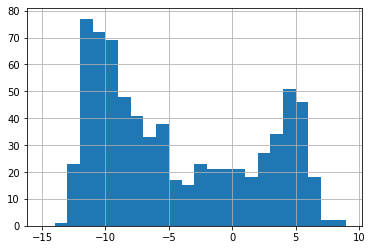

In [7]:
emt.cdh1_vim_ratio.hist( bins=arange(-15,10))

In [8]:
emt['CDH_VIM_hi'] = 0
emt['CDH_VIM_lo'] = 0
emt.loc[ emt.index[ where( emt.cdh1_vim_ratio>1)[0] ] , 'CDH_VIM_hi'] = 1 
emt.loc[ emt.index[ where( emt.cdh1_vim_ratio<-4)[0] ] , 'CDH_VIM_lo'] = 1

In [9]:
emt.head()

,cdh1_vim_ratio,CDH_VIM_hi,CDH_VIM_lo
ACH-001001,-10.29,0,1
ACH-000948,5.49,1,0
ACH-000011,-5.92,0,1
ACH-000323,-12.16,0,1
ACH-000905,-3.43,0,0


In [10]:
emt.drop('cdh1_vim_ratio', axis=1, inplace=True)

# Cell line metadata

In [11]:
cells = pd.read_csv('./Data/sample_info_808cells_20q4Avana.csv', index_col=0)
cells.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cell_line_name             792 non-null    object 
 1   stripped_cell_line_name    808 non-null    object 
 2   CCLE_Name                  808 non-null    object 
 3   alias                      36 non-null     object 
 4   COSMICID                   416 non-null    float64
 5   sex                        808 non-null    object 
 6   source                     808 non-null    object 
 7   Achilles_n_replicates      808 non-null    float64
 8   cell_line_NNMD             808 non-null    float64
 9   culture_type               643 non-null    object 
 10  culture_medium             808 non-null    object 
 11  cas9_activity              799 non-null    float64
 12  RRID                       750 non-null    object 
 13  WTSI_Master_Cell_ID        416 non-null

In [12]:
cells = cells[ ['cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'sex', 
       'culture_type', 'culture_medium', 'primary_disease', 'Subtype', 'age',
       'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype']]

### Add MSI from Chan et al

In [36]:
chan = pd.read_excel('./Data/Chan_et_al_2019_Supplementary_Table_1.xlsx')
chan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CCLE_ID                       1415 non-null   object 
 1   Lineage                       1183 non-null   object 
 2   GDSC_MSI                      985 non-null    object 
 3   CCLE_MSI                      1330 non-null   object 
 4   DRIVE_WRN_D2                  383 non-null    float64
 5   CRISPR_WRN_CERES              517 non-null    float64
 6   avg_WRN_dep                   680 non-null    float64
 7   is_WRN_dep                    680 non-null    float64
 8   TP53_status                   921 non-null    object 
 9   common_MSI_lineage            1415 non-null   bool   
 10  ms_deletions_normed           1330 non-null   float64
 11  frac_deletions_in_ms_regions  1330 non-null   float64
 12  MMR_loss                      969 non-null    float64
 13  MMR

In [37]:
msi_dict = chan.set_index('CCLE_ID')['CCLE_MSI'].to_dict()
cells['MSI'] = cells['CCLE_Name'].map(msi_dict )
cells.groupby('MSI')['MSI'].count()

MSI
MSI               45
MSS              538
indeterminate      3
Name: MSI, dtype: int64

In [38]:
cells.head(5)

,cell_line_name,stripped_cell_line_name,CCLE_Name,sex,culture_type,culture_medium,primary_disease,Subtype,age,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype,MSI
DepMap_ID,,,,,,,,,,,,,,
ACH-001172,NaN,R256,R256_CENTRAL_NERVOUS_SYSTEM,Unknown,not found,not found,Brain Cancer,Medulloblastoma,NaN,central_nervous_system,medulloblastoma,NaN,NaN,NaN
ACH-002017,Omm1,OMM1,OMM1_UVEA,Male,Adherent,RPMI 1640 + 20% FBS (w/3mM L-glutamine),Eye Cancer,Uveal Melanoma,NaN,eye,uveal_melanoma,NaN,NaN,NaN
ACH-001145,OC 316,OC316,OC316_OVARY,Female,Adherent,RPMI 1640 + 5% FBS,Ovarian Cancer,"Adenocarcinoma, serous",60.0,ovary,ovary_adenocarcinoma,serous,NaN,MSI
ACH-000995,JURKAT,JURKAT,JURKAT_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,Suspension,RPMI-1640 +10% FBS,Leukemia,"Acute Lymphoblastic Leukemia (ALL), T-cell",NaN,blood,ALL,t_cell,NaN,MSI
ACH-000391,MHH-ES-1,MHHES1,MHHES1_BONE,Male,Adherent,RPMI + 10% FBS,Bone Cancer,Ewings Sarcoma,12.0,bone,Ewing_sarcoma,NaN,EWS_FLI,MSS


In [39]:
cells.groupby('MSI').MSI.count()

MSI
MSI               45
MSS              538
indeterminate      3
Name: MSI, dtype: int64

In [16]:
cells.groupby('lineage_subtype').count()

,cell_line_name,stripped_cell_line_name,CCLE_Name,sex,culture_type,culture_medium,primary_disease,Subtype,age,lineage,lineage_sub_subtype,lineage_molecular_subtype,MSI
lineage_subtype,,,,,,,,,,,,,
ALL,13,13,13,13,10,13,13,13,10,13,13,0,9
AML,23,23,23,23,16,23,23,23,22,23,14,0,19
ATL,0,1,1,1,1,1,1,1,0,1,0,0,0
ATRT,5,5,5,5,5,5,5,5,4,5,0,0,0
CLL,1,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
undifferentiated_sarcoma,1,1,1,1,1,1,1,1,0,1,0,0,0
unspecified_leukemia,3,3,3,3,3,3,3,3,3,3,3,0,0
upper_aerodigestive_squamous,32,33,33,33,22,33,33,33,24,33,25,0,28


In [17]:
cell_meta_binary = pd.DataFrame( index=cells.index, dtype=bool )

#
# lineage
#
types = list(set(cells.lineage ) )
types = [str(x) for x in types]
types = [x for x in types if x != 'nan']
for header in types:
    cell_meta_binary[header] = False
    for ach in cell_meta_binary.index.values:
        if ( cells.loc[ach]['lineage']==header ):
            cell_meta_binary.loc[ach, header]=True
            
#
# lineage subtype
#
types = list(set(cells.lineage_subtype ) )
types = [str(x) for x in types]
types = [x for x in types if x != 'nan']
for header in types:
    cell_meta_binary[header] = False
    for ach in cell_meta_binary.index.values:
        if ( cells.loc[ach]['lineage_subtype']==header ):
            cell_meta_binary.loc[ach, header]=True

#
# lineage sub_subtype
#
types = list(set(cells.lineage_sub_subtype ) )
types = [str(x) for x in types]
types = [x for x in types if x != 'nan']
for header in types:
    cell_meta_binary[header] = False
    for ach in cell_meta_binary.index.values:
        if ( cells.loc[ach]['lineage_sub_subtype']==header ):
            cell_meta_binary.loc[ach, header]=True

#
# culture_type
#
types = list(set(cells.culture_type ) )
types = [str(x) for x in types]
types = [x for x in types if x != 'nan']
for header in types:
    cell_meta_binary[header] = False
    for ach in cell_meta_binary.index.values:
        if ( cells.loc[ach]['culture_type']==header ):
            cell_meta_binary.loc[ach, header]=True

#
# sex
#
types = list(set(cells.sex ) )
types = [str(x) for x in types]
types = [x for x in types if x != 'nan']
for header in types:
    cell_meta_binary[header] = False
    for ach in cell_meta_binary.index.values:
        if ( cells.loc[ach]['sex']==header ):
            cell_meta_binary.loc[ach, header]=True
            
#
# MSI
#
types = list(set(cells.MSI ) )
types = [str(x) for x in types]
types = [x for x in types if x != 'nan']
for header in types:
    cell_meta_binary[header] = False
    for ach in cell_meta_binary.index.values:
        if ( cells.loc[ach]['MSI']==header ):
            cell_meta_binary.loc[ach, header]=True

In [18]:
cell_meta_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 183 entries, plasma_cell to MSS
dtypes: bool(183)
memory usage: 183.0+ KB


In [19]:
cell_meta_binary.drop('Unknown', axis=1, inplace=True)

In [20]:
cell_meta_binary.sum()

plasma_cell       21
ovary             43
gastric           26
skin              56
embryo             1
                ... 
Male             402
Female           318
indeterminate      3
MSI               45
MSS              538
Length: 182, dtype: int64

In [21]:
cell_meta_binary.sum()

plasma_cell       21
ovary             43
gastric           26
skin              56
embryo             1
                ... 
Male             402
Female           318
indeterminate      3
MSI               45
MSS              538
Length: 182, dtype: int64

# Merge features 

In [23]:
feats = cell_meta_binary.join( gof, how='inner')
feats = feats.join( lof, how='inner', lsuffix='_GOF', rsuffix='_LOF')
feats = feats.join( emt, how='left')
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 36406 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(36404), float64(2)
memory usage: 28.1+ MB


In [24]:
num_cells_per_feat = feats.sum()

<AxesSubplot:>

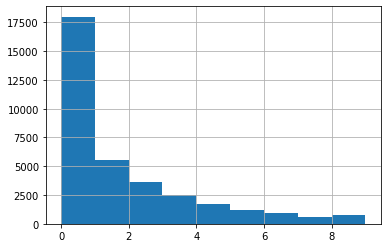

In [25]:
num_cells_per_feat.hist( bins=arange(10))

In [26]:
#
# 2% of 808 cell lines is 16.16. filter here?
#
# CML=7. arbitrary cutoff

len( where( num_cells_per_feat <= 6)[0] )

33475

In [27]:
too_low = where( num_cells_per_feat<=6)[0]
feats.drop( feats.columns[too_low], axis=1, inplace=True)
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2931 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2929), float64(2)
memory usage: 2.3+ MB


In [28]:
feats.head(3)

,plasma_cell,ovary,gastric,skin,central_nervous_system,bone,uterus,kidney,bile_duct,breast,...,ZRANB3_LOF,ZSCAN29_LOF,ZSWIM5_LOF,ZSWIM6_LOF,ZSWIM8_LOF,ZWILCH_LOF,ZXDC_LOF,ZZEF1_LOF,CDH_VIM_hi,CDH_VIM_lo
ACH-001172,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,NaN,NaN
ACH-002017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,NaN,NaN
ACH-001145,False,True,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,0.0,1.0


In [29]:
feats = feats.astype(bool)

In [30]:
feats.head(3)

,plasma_cell,ovary,gastric,skin,central_nervous_system,bone,uterus,kidney,bile_duct,breast,...,ZRANB3_LOF,ZSCAN29_LOF,ZSWIM5_LOF,ZSWIM6_LOF,ZSWIM8_LOF,ZWILCH_LOF,ZXDC_LOF,ZZEF1_LOF,CDH_VIM_hi,CDH_VIM_lo
ACH-001172,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
ACH-002017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
ACH-001145,False,True,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True


In [31]:
features = feats.columns.values
numGof = len( [x for x in features if '_GOF' in x])
numLof = len( [x for x in features if '_LOF' in x])
print(numGof, numLof)

91 2763


In [38]:
numCells, numFeats = feats.shape
print(numFeats, numCells)

2931 808


In [39]:
feats.to_csv('./Data/binFeats-cells-metadata-lof-gof-emt-' + str(numFeats) + 'feats-' + str(numCells) + 'cells-Avana20q4.txt', sep='\t', index=True)